In [5]:
from text2brick.dataset.dataset import Dataset
from text2brick.utils.ImageUtils import image_upscale
from text2brick.gym import CNN

In [6]:
dataset = Dataset()

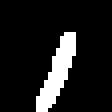

In [19]:
array, image = dataset.sample()
image = image_upscale(image, 4)
image

Using cache found in C:\Users\gourd/.cache\torch\hub\pytorch_vision_v0.10.0


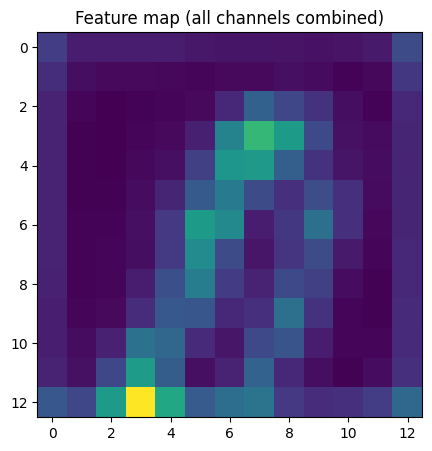

In [20]:
cnn = CNN()
result = cnn.forward(image)
cnn.feature_maps(result)